In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate #base 
from sklearn.dummy import DummyClassifier
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.model_selection import GroupKFold
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Supongamos que 'df' es tu DataFrame y que 'nombre_proyecto', 'descripcion' y 'responsable' son las columnas
df = pd.read_csv('4Predict_Analista.csv')

In [3]:
#df_f = df.loc[df['SOLICITANTE'] == 'Eduardo Iberico']
#df_c = df_f.dropna(subset=['RESPONSABLE EA'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   TIPO_PROYECTOS        951 non-null    object
 1   NOMBRE PROYECTO       951 non-null    object
 2   DESCRIPCIÓN PROYECTO  951 non-null    object
 3   PEP                   950 non-null    object
 4   CLASIF_RED_1          951 non-null    object
 5   CLASIF_RED_2          951 non-null    object
 6   RESPONSABLE EA        951 non-null    object
dtypes: object(7)
memory usage: 52.1+ KB


In [5]:
# Combinamos las columnas de texto en una sola
df_n = df.copy()
df_n.loc[:,'texto'] = df_n['NOMBRE PROYECTO'] + ' ' +df_n['DESCRIPCIÓN PROYECTO']
df_n.loc[:,'texto1'] = df_n['DESCRIPCIÓN PROYECTO']



In [73]:
df_n['DESCRIPCIÓN PROYECTO'].to_frame()

,DESCRIPCIÓN PROYECTO
0,Implementacion Densificacion
1,PEXT para Densificacion
2,Serv. Implementación puertos Enlaces MW
3,Servicio de ampliaciones de potencia
4,Serv. Implementación puertos Enlaces MW
...,...
946,Implementacion de fibra optica - proyectos 202...
947,Implementacion de fibra optica - proyectos 202...
948,Implementacion de fibra optica - proyectos 202...
949,Implementacion de fibra optica - proyectos 202...


In [6]:
df_n['texto'] = df_n['texto'].astype(str)
df_n['RESPONSABLE EA'] = df_n['RESPONSABLE EA'].str.upper()

In [7]:
df_n

,TIPO_PROYECTOS,NOMBRE PROYECTO,DESCRIPCIÓN PROYECTO,PEP,CLASIF_RED_1,CLASIF_RED_2,RESPONSABLE EA,texto,texto1
0,SOLUCIONES STREET CELLS,Street Cell,Implementacion Densificacion,RM-PE02KY230019-OR-SSC01,RF,Street Cell,DEMETRIO,Street Cell Implementacion Densificacion,Implementacion Densificacion
1,FO ACCESOS,Street Cell,PEXT para Densificacion,RM-PE02KY230019-TR-FAC01,RF,Street Cell,DEMETRIO,Street Cell PEXT para Densificacion,PEXT para Densificacion
2,MW ACCESO,Modernización MW Ultima Milla,Serv. Implementación puertos Enlaces MW,RM-PE02LY230127-TR-MAC01,Transmision,Modernización MW Ultima Milla,JENNY,Modernización MW Ultima Milla Serv. Implementa...,Serv. Implementación puertos Enlaces MW
3,ADECUACION DE SITIOS (ACCESO),Adecuaciones energía en sitios,Servicio de ampliaciones de potencia,RM-PE02LY230050-IM-IAS01,RF,Adecuaciones energía en sitios,JORGE,Adecuaciones energía en sitios Servicio de amp...,Servicio de ampliaciones de potencia
4,MW ACCESO,Modernización MW Ultima Milla,Serv. Implementación puertos Enlaces MW,RM-PE02NU230001-TR-MAC01,Transmision,Modernización MW Ultima Milla,JENNY,Modernización MW Ultima Milla Serv. Implementa...,Serv. Implementación puertos Enlaces MW
...,...,...,...,...,...,...,...,...,...
946,FO RED NACIONAL,Red de Fibra Optica Nacional,Implementacion de fibra optica - proyectos 202...,RM-PE02PY230471-TR-FRN01,Transmision,Red de Fibra Optica Nacional,MARCO,Red de Fibra Optica Nacional Implementacion de...,Implementacion de fibra optica - proyectos 202...
947,FO RED NACIONAL,Red de Fibra Optica Nacional,Implementacion de fibra optica - proyectos 202...,RM-PE02MY230211-TR-FRN01,Transmision,Red de Fibra Optica Nacional,MARCO,Red de Fibra Optica Nacional Implementacion de...,Implementacion de fibra optica - proyectos 202...
948,FO RED NACIONAL,Red de Fibra Optica Nacional,Implementacion de fibra optica - proyectos 202...,RM-PE02PT230035-TR-FRN01,Transmision,Red de Fibra Optica Nacional,MARCO,Red de Fibra Optica Nacional Implementacion de...,Implementacion de fibra optica - proyectos 202...
949,FO RED NACIONAL,Red de Fibra Optica Nacional,Implementacion de fibra optica - proyectos 202...,RM-PE02PY230472-TR-FRN01,Transmision,Red de Fibra Optica Nacional,MARCO,Red de Fibra Optica Nacional Implementacion de...,Implementacion de fibra optica - proyectos 202...


In [8]:
#Cuento las clases

# Asumiendo que 'df' es tu DataFrame y 'columna' es la columna que quieres verificar
condicion = (df_n['RESPONSABLE EA'] == 'MARLON')  # Reemplaza 'valor' con la condición que deseas comprobar
df_n = df_n.drop(df_n[condicion].index)

In [9]:
#balanceo de datos
# Supongamos que 'df' es tu DataFrame y que 'clase' es la columna objetivo
class_counts = df_n['RESPONSABLE EA'].value_counts() 
mean_samples = int(class_counts.mean())

df_upsampled = pd.DataFrame()

for class_name in class_counts.index:
    df_class = df_n[df_n['RESPONSABLE EA'] == class_name]
    if class_counts[class_name] < mean_samples:
        df_class_upsampled = resample(df_class, 
                                      replace=True, 
                                      n_samples=mean_samples,)
    else:
        df_class_upsampled = df_class
    df_upsampled = pd.concat([df_upsampled, df_class_upsampled])

# Mostrar el número de muestras por clase
print(df_upsampled['RESPONSABLE EA'].value_counts())

RESPONSABLE EA
ANGGIE      374
DEMETRIO    215
JHORDAN     105
JENNY       105
MARCO       105
DANNER      105
JORGE       105
LAURA       105
EDWIN       105
Name: count, dtype: int64


In [ ]:
from sklearn.utils import resample

# Suponemos que 'df' es tu DataFrame y que 'RESPONSABLE EA' es la columna objetivo
class_counts = df['RESPONSABLE EA'].value_counts()

# Calculamos la media de muestras por clase
mean_samples = int(class_counts.mean())

# Creamos un DataFrame vacío para almacenar los datos balanceados
df_balanced = pd.DataFrame()

# Iteramos sobre cada clase
for class_name in class_counts.index:
    # Seleccionamos todas las muestras de la clase actual
    df_class = df[df['RESPONSABLE EA'] == class_name]
    
    # Si el número de muestras en la clase actual es mayor que la media
    if class_counts[class_name] > mean_samples:
        # Realizamos un downsampling: eliminamos aleatoriamente muestras de la clase actual hasta que su número de muestras sea igual a la media
        df_class_balanced = resample(df_class, 
                                     replace=False,  # No permitimos muestrear la misma muestra más de una vez
                                     n_samples=mean_samples,  # El número de muestras a extraer
                                     random_state=123)  # La semilla para el generador de números aleatorios
    else:
        # Si el número de muestras en la clase actual es menor que la media
        # Realizamos un upsampling: añadimos aleatoriamente muestras de la clase actual hasta que su número de muestras sea igual a la media
        df_class_balanced = resample(df_class, 
                                     replace=True,  # Permitimos muestrear la misma muestra más de una vez
                                     n_samples=mean_samples,  # El número de muestras a extraer
                                     random_state=123)  # La semilla para el generador de números aleatorios
    
    # Añadimos la clase balanceada al DataFrame balanceado
    df_balanced = pd.concat([df_balanced, df_class_balanced])
# Imprimimos el número de muestras por clase en el DataFrame balanceado
print(df_balanced['RESPONSABLE EA'].value_counts())


In [64]:
df_upsampled

,TIPO_PROYECTOS,NOMBRE PROYECTO,DESCRIPCIÓN PROYECTO,PEP,CLASIF_RED_1,CLASIF_RED_2,RESPONSABLE EA,texto,texto1
8,BASEBANDS,Ampliacion de Capacidad,Servicio de Implementación Baseband,RM-PE02NY230077-EX-BBD01,RF,Ampliacion de Capacidad,ANGGIE,Ampliacion de Capacidad Servicio de Implementa...,Servicio de Implementación Baseband
77,BASEBANDS,Ampliacion de Capacidad,Servicio de Implementación Baseband,RM-PE02OY230155-EX-BBD01,RF,Ampliacion de Capacidad,ANGGIE,Ampliacion de Capacidad Servicio de Implementa...,Servicio de Implementación Baseband
78,BASEBANDS,Ampliacion de Capacidad,Servicio de Implementación Baseband,RM-PE02PY230220-EX-BBD01,RF,Ampliacion de Capacidad,ANGGIE,Ampliacion de Capacidad Servicio de Implementa...,Servicio de Implementación Baseband
79,BASEBANDS,Ampliacion de Capacidad,Servicio de Implementación Baseband,RM-PE02OY230162-EX-BBD01,RF,Ampliacion de Capacidad,ANGGIE,Ampliacion de Capacidad Servicio de Implementa...,Servicio de Implementación Baseband
80,BASEBANDS,Ampliacion de Capacidad,Servicio de Implementación Baseband,RM-PE02OY230163-EX-BBD01,RF,Ampliacion de Capacidad,ANGGIE,Ampliacion de Capacidad Servicio de Implementa...,Servicio de Implementación Baseband
...,...,...,...,...,...,...,...,...,...
915,MW ACCESO,Sitios Nuevos Macro y Regulatorios,MAC para Roll Out,RM-PE02UY230352-TR-MAC01,RF,Sitios Nuevos Macro y Regulatorios,EDWIN,Sitios Nuevos Macro y Regulatorios MAC para Ro...,MAC para Roll Out
907,MW ACCESO,Sitios Nuevos Macro y Regulatorios,MAC para Roll Out,RM-PE02OY230182-TR-MAC01,RF,Sitios Nuevos Macro y Regulatorios,EDWIN,Sitios Nuevos Macro y Regulatorios MAC para Ro...,MAC para Roll Out
878,MW ACCESO,Sitios Nuevos Macro y Regulatorios,MAC para Roll Out,RM-PE02LY230231-TR-MAC01,RF,Sitios Nuevos Macro y Regulatorios,EDWIN,Sitios Nuevos Macro y Regulatorios MAC para Ro...,MAC para Roll Out
908,MW ACCESO,Sitios Nuevos Macro y Regulatorios,MAC para Roll Out,RM-PE02OY230183-TR-MAC01,RF,Sitios Nuevos Macro y Regulatorios,EDWIN,Sitios Nuevos Macro y Regulatorios MAC para Ro...,MAC para Roll Out


In [62]:
conteo_clases = df_n['RESPONSABLE EA'].value_counts()
conteo_clases

RESPONSABLE EA
ANGGIE      374
DEMETRIO    215
JHORDAN      77
JENNY        70
MARCO        57
DANNER       56
JORGE        55
LAURA        29
EDWIN        17
Name: count, dtype: int64

In [63]:
df_n.to_csv('4Predict.csv', index=False)
df_upsampled.to_csv('4PredictB.csv', index=False)

In [ ]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [65]:
X_test

<190x104 sparse matrix of type '<class 'numpy.int64'>'
	with 1427 stored elements in Compressed Sparse Row format>

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score


features = ['NOMBRE PROYECTO','DESCRIPCIÓN PROYECTO']

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_upsampled[features], df_upsampled['RESPONSABLE EA'], test_size=0.20, random_state=42)

# Creamos un transformador de columnas para manejar el preprocesamiento de cada columna
preprocessor = ColumnTransformer(
    transformers=[
        ('NOMBRE PROYECTO', CountVectorizer(), 'NOMBRE PROYECTO'),
        ('DESCRIPCIÓN PROYECTO', CountVectorizer(), 'DESCRIPCIÓN PROYECTO')
       # ('texto2', CountVectorizer(), 'texto2')
    ])

# Creamos un pipeline que primero transforma los datos y luego entrena un modelo de bosque aleatorio
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(n_estimators=50, random_state=42, max_depth=10))])

# Realizamos validación cruzada en el conjunto de entrenamiento
scores = cross_val_score(clf, X_train, y_train, cv=5)

print(f'La precisión del modelo en los datos de entrenamiento con validación cruzada es: {scores.mean()}')

# Ajustamos el modelo en el conjunto de entrenamiento
clf.fit(X_train, y_train)

# Ahora puedes usar 'clf.predict(X_test)' para predecir los responsables de los proyectos en tu conjunto de prueba
# Calculamos la precisión del modelo en los datos de prueba
precision = clf.score(X_test, y_test)

print(f'La precisión del modelo en los datos de prueba es: {precision}')



La precisión del modelo en los datos de entrenamiento con validación cruzada es: 0.9017705445765895
La precisión del modelo en los datos de prueba es: 0.8830188679245283


In [13]:
# Concatenar es lo mismo que pasar las 2 columnas separadas, es decir,
#vectorizarlas juntas o separadas da igual, pero separadas te da mas margen de analisis

In [14]:
from sklearn.model_selection import cross_val_score

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_n['texto'], df_n['RESPONSABLE EA'], test_size=0.2, random_state=42)

# Convertimos el texto a una matriz de recuento de palabras
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Entrenamos un modelo de bosque aleatorio
clf = RandomForestClassifier(n_estimators=50, random_state=42)

# Realizamos validación cruzada en el conjunto de entrenamiento
scores = cross_val_score(clf, X_train, y_train, cv=5)

print(f'La precisión del modelo en los datos de entrenamiento con validación cruzada es: {scores.mean()}')

# Ajustamos el modelo en el conjunto de entrenamiento
clf.fit(X_train, y_train)

# Ahora puedes usar 'clf.predict(X_test)' para predecir los responsables de los proyectos en tu conjunto de prueba
# Calculamos la precisión del modelo en los datos de prueba
precision = clf.score(X_test, y_test)

print(f'La precisión del modelo en los datos de prueba es: {precision}')



La precisión del modelo en los datos de entrenamiento con validación cruzada es: 0.9052631578947368
La precisión del modelo en los datos de prueba es: 0.9157894736842105


In [76]:
X_train

<760x104 sparse matrix of type '<class 'numpy.int64'>'
	with 5757 stored elements in Compressed Sparse Row format>

In [15]:
SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier()
results = cross_validate(modelo, X_test, y_test, cv = 5, return_train_score=False)
media = results['test_score'].mean()
desviacion_estandar = results['test_score'].std()
print("Accuracy con dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * desviacion_estandar)*100, (media + 2 * desviacion_estandar) * 100))

Accuracy con dummy stratified, 10 = [33.21, 38.37]


C:\Users\C26764\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


# Explorar hiperparametros

### Vectorizar

In [16]:
datos = df_n
x_ord = df_n['texto']
y_ord = df_n['RESPONSABLE EA']


In [17]:
df_n['grupo'] = df_n.groupby(['NOMBRE PROYECTO', 'DESCRIPCIÓN PROYECTO']).ngroup()

In [18]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Index: 950 entries, 0 to 950
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   TIPO_PROYECTOS        950 non-null    object
 1   NOMBRE PROYECTO       950 non-null    object
 2   DESCRIPCIÓN PROYECTO  950 non-null    object
 3   PEP                   949 non-null    object
 4   CLASIF_RED_1          950 non-null    object
 5   CLASIF_RED_2          950 non-null    object
 6   RESPONSABLE EA        950 non-null    object
 7   texto                 950 non-null    object
 8   texto1                950 non-null    object
 9   grupo                 950 non-null    int64 
dtypes: int64(1), object(9)
memory usage: 81.6+ KB


In [50]:
df_n['RESPONSABLE EA'].unique().tolist()

['DEMETRIO',
 'JENNY',
 'JORGE',
 'ANGGIE',
 'DANNER',
 'LAURA',
 'JHORDAN',
 'MARCO',
 'EDWIN']

In [19]:
# Dividimos los datos en conjuntos de entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(df_n['texto'], df_n['RESPONSABLE EA'], test_size=0.2, random_state=42)

# Convertimos el texto a una matriz de recuento de palabras
x_vect = vectorizer.transform(x_ord)

In [28]:
#Tengo que vectorizar los datos str antes de meterlo al modelo en este caso tmb las etiquetas de la columna objetivo 
len(df_n.grupo.unique())

22

### aqui me falta adaptar esta funcion para los hiperparametros de mi randimforestClassifier, y la entrada de datos para mi conjunto de datos

In [21]:
def iniciar_arbol_de_decision(n_estimators, max_depth, min_samples_leaf, min_samples_split):
  SEED = 42
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf,
                                  min_samples_split=min_samples_split)
  results = cross_validate(modelo, x_vect, y_ord, cv = cv, groups =df_n.grupo, return_train_score=True)
  fit_time = results['fit_time'].mean()
  score_time = results['score_time'].mean()
  train_score = results['train_score'].mean()*100
  test_score = results['test_score'].mean()*100
  #print('Arbol max_depth = %d, min_samples_leaf = %d, min_samples_split = %d, training = %.2f, testing = %.2f' % (max_depth, min_samples_leaf, min_samples_split, train_score, test_score))
  tabla = [max_depth, min_samples_leaf, min_samples_split, train_score, test_score, fit_time, score_time]
  return tabla

def buscar():
  resultados = []
  for n_estimators in [25, 50, 100, 150]:
      for max_depth in range(1,33):
        for min_samples_leaf in [32, 64, 128, 256]:
          for min_samples_split in [32, 64, 128, 256]:
            tabla = iniciar_arbol_de_decision(n_estimators, max_depth, min_samples_leaf,min_samples_split)
            resultados.append(tabla)
      resultados = pd.DataFrame(resultados, columns=['max_depth','min_samples_leaf', 'min_samples_split', 'train','test','fit_time', 'score_time'])
      return resultados

resultados = buscar()


In [22]:
resultados

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
0,1,32,32,62.643785,28.629697,0.018144,0.000930
1,1,32,64,62.643785,28.629697,0.015201,0.000936
2,1,32,128,62.643785,28.629697,0.014849,0.001861
3,1,32,256,62.643785,28.629697,0.016051,0.000842
4,1,64,32,60.646069,20.505224,0.015034,0.001374
...,...,...,...,...,...,...,...
507,32,128,256,59.063012,13.838557,0.029994,0.002227
508,32,256,32,41.964407,6.576653,0.027201,0.003510
509,32,256,64,41.964407,6.576653,0.028127,0.002465
510,32,256,128,41.964407,6.576653,0.027490,0.003270


In [23]:
corr = resultados.corr()

<Axes: >

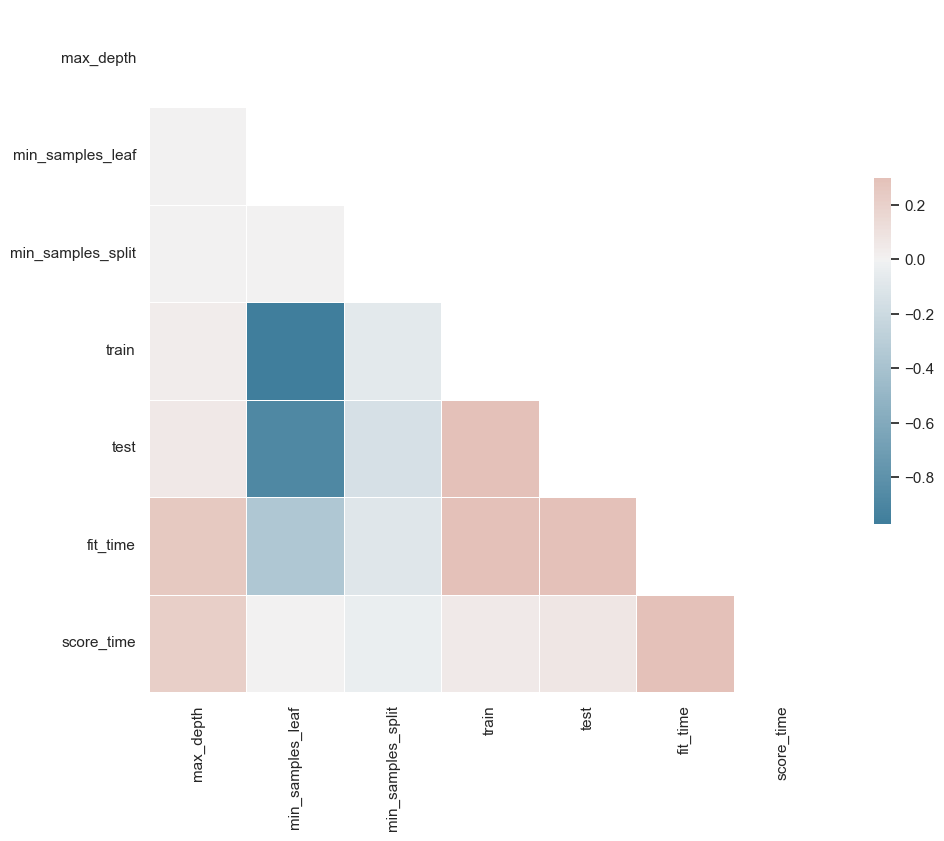

In [24]:
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [30]:
from sklearn.model_selection import GridSearchCV

SEED = 301
np.random.seed(SEED)

espacio_de_parametros = {
    'n_estimators' : [50,100],
    'max_depth' : [3,5],
    'min_samples_split' : [32,64,128],
    'min_samples_leaf' : [32,64,128],
    'criterion' : ['gini', 'entropy']
}

buscar = GridSearchCV(RandomForestClassifier(),
                      espacio_de_parametros,
                      cv = GroupKFold(n_splits = 10))

buscar.fit(x_vect, y_ord, groups = df_n.grupo)
resultados = pd.DataFrame(buscar.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.060507,0.002114,0.004509,0.000690,gini,3,32,32,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",...,0.936508,0.983871,0.0,0.044118,0.064516,0.058824,0.191176,0.427585,0.453493,31
1,0.116401,0.003552,0.006733,0.001280,gini,3,32,32,100,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",...,0.936508,0.983871,0.0,0.044118,0.064516,0.250000,0.191176,0.446702,0.441413,28
2,0.059302,0.003171,0.003595,0.002135,gini,3,32,64,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",...,0.936508,0.983871,0.0,0.044118,0.064516,0.485294,0.191176,0.470232,0.436545,15
3,0.115596,0.004275,0.007460,0.002265,gini,3,32,64,100,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",...,0.936508,0.983871,0.0,0.044118,0.064516,0.058824,0.191176,0.427585,0.453493,31
4,0.058552,0.002391,0.004188,0.002949,gini,3,32,128,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",...,0.936508,0.983871,0.0,0.044118,0.064516,0.485294,0.191176,0.470232,0.436545,15


In [32]:
print(buscar.best_params_)
print(buscar.best_score_ * 100)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 32, 'n_estimators': 50}
52.981578887998225


In [33]:
mejor = buscar.best_estimator_
mejor

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=32,
                       min_samples_split=32, n_estimators=50)

In [35]:
from sklearn.metrics import accuracy_score

#Escenario Optimista
prediccion = mejor.predict(x_vect)
accuracy = accuracy_score(prediccion, y_ord) * 100
print('Accuracy para los datos fue %.2f%%' % accuracy)

Accuracy para los datos fue 76.74%


# Nested Cross Validation  (Doble validacion Cruzada)
Escenario Real

In [39]:
from sklearn.model_selection import KFold

SEED = 301
np.random.seed(SEED)

espacio_de_parametros = {
    'n_estimators' : [50,100],
    'max_depth' : [3,5],
    'min_samples_split' : [32,64,128],
    'min_samples_leaf' : [32,64,128],
    'criterion' : ['gini', 'entropy']
}

buscar = GridSearchCV(RandomForestClassifier(),
                      espacio_de_parametros,
                      cv = KFold(n_splits = 10))

buscar.fit(x_vect, y_ord)
resultados = pd.DataFrame(buscar.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.057506,0.002981,0.004160,0.001767,gini,3,32,32,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",...,0.789474,1.0,0.705263,0.442105,0.810526,0.831579,0.568421,0.745263,0.161145,20
1,0.112336,0.002023,0.006076,0.002120,gini,3,32,32,100,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",...,0.831579,1.0,0.705263,0.442105,0.810526,0.831579,0.568421,0.746316,0.148302,18
2,0.056036,0.002577,0.004459,0.002435,gini,3,32,64,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",...,0.831579,1.0,0.705263,0.442105,0.852632,0.915789,0.568421,0.746316,0.158417,19
3,0.110798,0.003274,0.006847,0.002555,gini,3,32,64,100,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",...,0.831579,1.0,0.715789,0.442105,0.852632,0.915789,0.568421,0.771579,0.163484,5
4,0.056645,0.002535,0.003394,0.001726,gini,3,32,128,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",...,0.831579,1.0,0.705263,0.442105,0.852632,0.915789,0.568421,0.749474,0.172053,17


In [41]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(buscar, x_vect, y_ord, cv = KFold(n_splits=5, shuffle=True))
scores

array([0.86315789, 0.75263158, 0.75789474, 0.76842105, 0.77368421])

In [42]:
def imprime_score(scores):
  media = scores.mean() * 100
  desviacion = scores.std() * 100
  print("Accuracy media %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desviacion, media + 2 * desviacion))

In [43]:
imprime_score(scores) 

Accuracy media 78.32
Intervalo [70.18, 86.45]


In [54]:
mejor = buscar.best_estimator_
mejor

RandomForestClassifier(max_depth=5, min_samples_leaf=32, min_samples_split=32,
                       n_estimators=50)

## Predecir analistas faltantes

In [2]:
from joblib import load

# Supongamos que 'ruta_al_modelo.joblib' es la ruta al archivo .joblib
modelo = load('modelos/Predict.joblib')


ModuleNotFoundError: No module named 'ads.common'

In [ ]:
DF_EI.head()

In [ ]:
Dfnan = DF_EI[DF_EI['RESPONSABLE EA'].isna()]

In [ ]:
Dfnan

In [ ]:
# Supongamos que tu dataframe se llama df y las columnas se llaman col1 y col2
# Y que tu modelo entrenado se llama clf y tu CountVectorizer se llama vectorizer

# Concatena el texto de las dos columnas
Dfnan['texto_concatenado'] = Dfnan['NOMBRE PROYECTO'] + " " + Dfnan['DESCRIPCIÓN PROYECTO']

# Convierte el texto concatenado a una matriz de recuento de palabras
X = vectorizer.transform(Dfnan['texto_concatenado'])

# Usa el método predict de tu modelo para predecir los valores de la nueva columna.
Dfnan['Analista_pred'] = clf.predict(X)


In [ ]:
Dfnan

In [ ]:
Dfnan.to_excel('Test0.xlsx',index=False) #Lo exporto a excel

In [ ]:
from joblib import dump

dump(model, 'regression.joblib')
